# Airline delays 
## Bureau of Transportation Statistics
https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236   
https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations

2015 - 2019

### Additional sources
This might be useful in matching station codes to airports:
1. http://dss.ucar.edu/datasets/ds353.4/inventories/station-list.html
2. https://www.world-airport-codes.com/

In [0]:
from pyspark.sql import functions as f
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, IntegerType, NullType, ShortType, DateType, BooleanType, BinaryType
from pyspark.sql import SQLContext
from pyspark.sql import types
from pyspark.sql.functions import *

sqlContext = SQLContext(sc)


In [0]:
username = dbutils.notebook.entry_point.getDbutils().notebook().getContext().tags().apply('user')
userhome = 'dbfs:/user/' + username
final_project_path = userhome + "/FINAL_PROJECT/" 

In [0]:
FINAL_PROJECT_path_open = '/dbfs' + final_project_path.split(':')[-1] # for use with python open()
dbutils.fs.mkdirs(final_project_path)

In [0]:
display(dbutils.fs.ls("dbfs:/mnt/mids-w261/datasets_final_project/"))

path name size dbfs:/mnt/mids-w261/datasets_final_project/airlines_data/ airlines_data/ 0 dbfs:/mnt/mids-w261/datasets_final_project/allstate-claims-severity.zip allstate-claims-severity.zip 51204863 dbfs:/mnt/mids-w261/datasets_final_project/dac.tar.gz dac.tar.gz 4576820670 dbfs:/mnt/mids-w261/datasets_final_project/kdd-cup-2014-predicting-excitement-at-donors-choose.zip kdd-cup-2014-predicting-excitement-at-donors-choose.zip 971133938 dbfs:/mnt/mids-w261/datasets_final_project/parquet_airlines_data/ parquet_airlines_data/ 0 dbfs:/mnt/mids-w261/datasets_final_project/parquet_airlines_data_3m/ parquet_airlines_data_3m/ 0 dbfs:/mnt/mids-w261/datasets_final_project/parquet_airlines_data_6m/ parquet_airlines_data_6m/ 0 dbfs:/mnt/mids-w261/datasets_final_project/porto-seguro-safe-driver-prediction.zip porto-seguro-safe-driver-prediction.zip 80247571 dbfs:/mnt/mids-w261/datasets_final_project/walmart-recruiting-trip-type-classification.zip walmart-recruiting-trip-type-classification.zip 11510035 dbfs:/mnt/mids-w261/datasets_final_project/weather_data/ weather_data/ 0 dbfs:/mnt/mids-w261/datasets_final_project/weather_data_6_hr/ weather_data_6_hr/ 0 dbfs:/mnt/mids-w261/datasets_final_project/weather_data_single/ weather_data_single/ 0

In [0]:
display(dbutils.fs.ls("dbfs:/mnt/mids-w261/datasets_final_project/weather_data"))

path name size dbfs:/mnt/mids-w261/datasets_final_project/weather_data/weather-miss.parquet/ weather-miss.parquet/ 0 dbfs:/mnt/mids-w261/datasets_final_project/weather_data/weather2015a.parquet/ weather2015a.parquet/ 0 dbfs:/mnt/mids-w261/datasets_final_project/weather_data/weather2016a.parquet/ weather2016a.parquet/ 0 dbfs:/mnt/mids-w261/datasets_final_project/weather_data/weather2017a.parquet/ weather2017a.parquet/ 0 dbfs:/mnt/mids-w261/datasets_final_project/weather_data/weather2018a.parquet/ weather2018a.parquet/ 0 dbfs:/mnt/mids-w261/datasets_final_project/weather_data/weather2019a.parquet/ weather2019a.parquet/ 0

In [0]:
airlines = spark.read.option("header", "true").parquet(f"dbfs:/mnt/mids-w261/datasets_final_project/parquet_airlines_data/201*.parquet")
display(airlines.sample(False, 0.00001))

YEAR QUARTER MONTH DAY_OF_MONTH DAY_OF_WEEK FL_DATE OP_UNIQUE_CARRIER OP_CARRIER_AIRLINE_ID OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM ORIGIN_AIRPORT_ID ORIGIN_AIRPORT_SEQ_ID ORIGIN_CITY_MARKET_ID ORIGIN ORIGIN_CITY_NAME ORIGIN_STATE_ABR ORIGIN_STATE_FIPS ORIGIN_STATE_NM ORIGIN_WAC DEST_AIRPORT_ID DEST_AIRPORT_SEQ_ID DEST_CITY_MARKET_ID DEST DEST_CITY_NAME DEST_STATE_ABR DEST_STATE_FIPS DEST_STATE_NM DEST_WAC CRS_DEP_TIME DEP_TIME DEP_DELAY DEP_DELAY_NEW DEP_DEL15 DEP_DELAY_GROUP DEP_TIME_BLK TAXI_OUT WHEELS_OFF WHEELS_ON TAXI_IN CRS_ARR_TIME ARR_TIME ARR_DELAY ARR_DELAY_NEW ARR_DEL15 ARR_DELAY_GROUP ARR_TIME_BLK CANCELLED CANCELLATION_CODE DIVERTED CRS_ELAPSED_TIME ACTUAL_ELAPSED_TIME AIR_TIME FLIGHTS DISTANCE DISTANCE_GROUP CARRIER_DELAY WEATHER_DELAY NAS_DELAY SECURITY_DELAY LATE_AIRCRAFT_DELAY FIRST_DEP_TIME TOTAL_ADD_GTIME LONGEST_ADD_GTIME DIV_AIRPORT_LANDINGS DIV_REACHED_DEST DIV_ACTUAL_ELAPSED_TIME DIV_ARR_DELAY DIV_DISTANCE DIV1_AIRPORT DIV1_AIRPORT_ID DIV1_AIRPORT_SEQ_ID DIV1_WHEELS_ON DIV1_TOTAL_GTIME DIV1_LONGEST_GTIME DIV1_WHEELS_OFF DIV1_TAIL_NUM DIV2_AIRPORT DIV2_AIRPORT_ID DIV2_AIRPORT_SEQ_ID DIV2_WHEELS_ON DIV2_TOTAL_GTIME DIV2_LONGEST_GTIME DIV2_WHEELS_OFF DIV2_TAIL_NUM DIV3_AIRPORT DIV3_AIRPORT_ID DIV3_AIRPORT_SEQ_ID DIV3_WHEELS_ON DIV3_TOTAL_GTIME DIV3_LONGEST_GTIME DIV3_WHEELS_OFF DIV3_TAIL_NUM DIV4_AIRPORT DIV4_AIRPORT_ID DIV4_AIRPORT_SEQ_ID DIV4_WHEELS_ON DIV4_TOTAL_GTIME DIV4_LONGEST_GTIME DIV4_WHEELS_OFF DIV4_TAIL_NUM DIV5_AIRPORT DIV5_AIRPORT_ID DIV5_AIRPORT_SEQ_ID DIV5_WHEELS_ON DIV5_TOTAL_GTIME DIV5_LONGEST_GTIME DIV5_WHEELS_OFF DIV5_TAIL_NUM 2019 2 6 19 3 2019-06-19 F9 20436 F9 N332FR 1834 10423 1042302 30423 AUS Austin, TX TX 48 Texas 74 11433 1143302 31295 DTW Detroit, MI MI 26 Michigan 43 625 649 24.0 24.0 1.0 1 0600-0659 14.0 703 1027 9.0 1025 1036 11.0 11.0 0.0 0 1000-1059 0.0 null 0.0 180.0 167.0 144.0 1.0 1149.0 5 null null null null null null null null 0 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 2019 2 6 19 3 2019-06-19 OO 20304 OO N787SK 5521 13476 1347605 34922 MRY Monterey, CA CA 6 California 91 12892 1289208 32575 LAX Los Angeles, CA CA 6 California 91 600 559 -1.0 0.0 0.0 -1 0600-0659 16.0 615 711 11.0 729 722 -7.0 0.0 0.0 -1 0700-0759 0.0 null 0.0 89.0 83.0 56.0 1.0 266.0 2 null null null null null null null null 0 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 2019 2 6 27 4 2019-06-27 G4 20368 G4 326NV 1423 14122 1412202 30198 PIT Pittsburgh, PA PA 42 Pennsylvania 23 14685 1468502 34685 SAV Savannah, GA GA 13 Georgia 34 1812 1946 94.0 94.0 1.0 6 1800-1859 10.0 1956 2111 6.0 1948 2117 89.0 89.0 1.0 5 1900-1959 0.0 null 0.0 96.0 91.0 75.0 1.0 579.0 3 9.0 0.0 0.0 0.0 80.0 null null null 0 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 2016 3 8 24 3 2016-08-24 AA 19805 AA N3MJAA 352 13930 1393004 30977 ORD Chicago, IL IL 17 Illinois 41 12953 1295302 31703 LGA New York, NY NY 36 New York 22 1740 1741 1.0 1.0 0.0 0 1700-1759 11.0 1752 2034 5.0 2044 2039 -5.0 0.0 0.0 -1 2000-2059 0.0 null 0.0 124.0 118.0 102.0 1.0 733.0 3 null null null null null null null null 0 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 2016 3 8 26 5 2016-08-26 AA 19805 AA N890AA 1144 12953 1295302 31703 LGA New York, NY NY 36 New York 22 11298 1129804 30194 DFW Dallas/Fort Worth, TX TX 48 Texas 74 1959 2019 20.0 20.0 1.0 1 1900-1959 49.0 

In [0]:
airlines.printSchema()

root
-- YEAR: integer (nullable = true)
-- QUARTER: integer (nullable = true)
-- MONTH: integer (nullable = true)
-- DAY_OF_MONTH: integer (nullable = true)
-- DAY_OF_WEEK: integer (nullable = true)
-- FL_DATE: string (nullable = true)
-- OP_UNIQUE_CARRIER: string (nullable = true)
-- OP_CARRIER_AIRLINE_ID: integer (nullable = true)
-- OP_CARRIER: string (nullable = true)
-- TAIL_NUM: string (nullable = true)
-- OP_CARRIER_FL_NUM: integer (nullable = true)
-- ORIGIN_AIRPORT_ID: integer (nullable = true)
-- ORIGIN_AIRPORT_SEQ_ID: integer (nullable = true)
-- ORIGIN_CITY_MARKET_ID: integer (nullable = true)
-- ORIGIN: string (nullable = true)
-- ORIGIN_CITY_NAME: string (nullable = true)
-- ORIGIN_STATE_ABR: string (nullable = true)
-- ORIGIN_STATE_FIPS: integer (nullable = true)
-- ORIGIN_STATE_NM: string (nullable = true)
-- ORIGIN_WAC: integer (nullable = true)
-- DEST_AIRPORT_ID: integer (nullable = true)
-- DEST_AIRPORT_SEQ_ID: integer (nullable = true)
-- DEST_CITY_MARKET_ID: integer (nullable = true)
-- DEST: string (nullable = true)
-- DEST_CITY_NAME: string (nullable = true)
-- DEST_STATE_ABR: string (nullable = true)
-- DEST_STATE_FIPS: integer (nullable = true)
-- DEST_STATE_NM: string (nullable = true)
-- DEST_WAC: integer (nullable = true)
-- CRS_DEP_TIME: integer (nullable = true)
-- DEP_TIME: integer (nullable = true)
-- DEP_DELAY: double (nullable = true)
-- DEP_DELAY_NEW: double (nullable = true)
-- DEP_DEL15: double (nullable = true)
-- DEP_DELAY_GROUP: integer (nullable = true)
-- DEP_TIME_BLK: string (nullable = true)
-- TAXI_OUT: double (nullable = true)
-- WHEELS_OFF: integer (nullable = true)
-- WHEELS_ON: integer (nullable = true)
-- TAXI_IN: double (nullable = true)
-- CRS_ARR_TIME: integer (nullable = true)
-- ARR_TIME: integer (nullable = true)
-- ARR_DELAY: double (nullable = true)
-- ARR_DELAY_NEW: double (nullable = true)
-- ARR_DEL15: double (nullable = true)
-- ARR_DELAY_GROUP: integer (nullable = true)
-- ARR_TIME_BLK: string (nullable = true)
-- CANCELLED: double (nullable = true)
-- CANCELLATION_CODE: string (nullable = true)
-- DIVERTED: double (nullable = true)
-- CRS_ELAPSED_TIME: double (nullable = true)
-- ACTUAL_ELAPSED_TIME: double (nullable = true)
-- AIR_TIME: double (nullable = true)
-- FLIGHTS: double (nullable = true)
-- DISTANCE: double (nullable = true)
-- DISTANCE_GROUP: integer (nullable = true)
-- CARRIER_DELAY: double (nullable = true)
-- WEATHER_DELAY: double (nullable = true)
-- NAS_DELAY: double (nullable = true)
-- SECURITY_DELAY: double (nullable = true)
-- LATE_AIRCRAFT_DELAY: double (nullable = true)
-- FIRST_DEP_TIME: integer (nullable = true)
-- TOTAL_ADD_GTIME: double (nullable = true)
-- LONGEST_ADD_GTIME: double (nullable = true)
-- DIV_AIRPORT_LANDINGS: integer (nullable = true)
-- DIV_REACHED_DEST: double (nullable = true)
-- DIV_ACTUAL_ELAPSED_TIME: double (nullable = true)
-- DIV_ARR_DELAY: double (nullable = true)
-- DIV_DISTANCE: double (nullable = true)
-- DIV1_AIRPORT: string (nullable = true)
-- DIV1_AIRPORT_ID: integer (nullable = true)
-- DIV1_AIRPORT_SEQ_ID: integer (nullable = true)
-- DIV1_WHEELS_ON: integer (nullable = true)
-- DIV1_TOTAL_GTIME: double (nullable = true)
-- DIV1_LONGEST_GTIME: double (nullable = true)
-- DIV1_WHEELS_OFF: integer (nullable = true)
-- DIV1_TAIL_NUM: string (nullable = true)
-- DIV2_AIRPORT: string (nullable = true)
-- DIV2_AIRPORT_ID: integer (nullable = true)
-- DIV2_AIRPORT_SEQ_ID: integer (nullable = true)
-- DIV2_WHEELS_ON: integer (nullable = true)
-- DIV2_TOTAL_GTIME: double (nullable = true)
-- DIV2_LONGEST_GTIME: double (nullable = true)
-- DIV2_WHEELS_OFF: integer (nullable = true)
-- DIV2_TAIL_NUM: string (nullable = true)
-- DIV3_AIRPORT: string (nullable = true)
-- DIV3_AIRPORT_ID: integer (nullable = true)
-- DIV3_AIRPORT_SEQ_ID: integer (nullable = true)
-- DIV3_WHEELS_ON: integer (nullable = true)
-- DIV3_TOTAL_GTIME: double (nullable = true)
-- DIV3_LONGEST_GTIME: double (nullable = true)
-- DIV3_WHEELS_

In [0]:
f'{airlines.count():,}'

Out[80]: '31,746,841'

In [0]:
display(airlines.describe())

summary YEAR QUARTER MONTH DAY_OF_MONTH DAY_OF_WEEK FL_DATE OP_UNIQUE_CARRIER OP_CARRIER_AIRLINE_ID OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM ORIGIN_AIRPORT_ID ORIGIN_AIRPORT_SEQ_ID ORIGIN_CITY_MARKET_ID ORIGIN ORIGIN_CITY_NAME ORIGIN_STATE_ABR ORIGIN_STATE_FIPS ORIGIN_STATE_NM ORIGIN_WAC DEST_AIRPORT_ID DEST_AIRPORT_SEQ_ID DEST_CITY_MARKET_ID DEST DEST_CITY_NAME DEST_STATE_ABR DEST_STATE_FIPS DEST_STATE_NM DEST_WAC CRS_DEP_TIME DEP_TIME DEP_DELAY DEP_DELAY_NEW DEP_DEL15 DEP_DELAY_GROUP DEP_TIME_BLK TAXI_OUT WHEELS_OFF WHEELS_ON TAXI_IN CRS_ARR_TIME ARR_TIME ARR_DELAY ARR_DELAY_NEW ARR_DEL15 ARR_DELAY_GROUP ARR_TIME_BLK CANCELLED CANCELLATION_CODE DIVERTED CRS_ELAPSED_TIME ACTUAL_ELAPSED_TIME AIR_TIME FLIGHTS DISTANCE DISTANCE_GROUP CARRIER_DELAY WEATHER_DELAY NAS_DELAY SECURITY_DELAY LATE_AIRCRAFT_DELAY FIRST_DEP_TIME TOTAL_ADD_GTIME LONGEST_ADD_GTIME DIV_AIRPORT_LANDINGS DIV_REACHED_DEST DIV_ACTUAL_ELAPSED_TIME DIV_ARR_DELAY DIV_DISTANCE DIV1_AIRPORT DIV1_AIRPORT_ID DIV1_AIRPORT_SEQ_ID DIV1_WHEELS_ON DIV1_TOTAL_GTIME DIV1_LONGEST_GTIME DIV1_WHEELS_OFF DIV1_TAIL_NUM DIV2_AIRPORT DIV2_AIRPORT_ID DIV2_AIRPORT_SEQ_ID DIV2_WHEELS_ON DIV2_TOTAL_GTIME DIV2_LONGEST_GTIME DIV2_WHEELS_OFF DIV2_TAIL_NUM DIV3_AIRPORT DIV3_AIRPORT_ID DIV3_AIRPORT_SEQ_ID DIV3_WHEELS_ON DIV3_TOTAL_GTIME DIV3_LONGEST_GTIME DIV3_WHEELS_OFF DIV3_TAIL_NUM DIV4_AIRPORT DIV4_AIRPORT_ID DIV4_AIRPORT_SEQ_ID DIV4_WHEELS_ON DIV4_TOTAL_GTIME DIV4_LONGEST_GTIME DIV4_WHEELS_OFF DIV4_TAIL_NUM DIV5_AIRPORT DIV5_AIRPORT_ID DIV5_AIRPORT_SEQ_ID DIV5_WHEELS_ON DIV5_TOTAL_GTIME DIV5_LONGEST_GTIME DIV5_WHEELS_OFF DIV5_TAIL_NUM count 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31674354 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31274521 31269545 31269545 31269545 31269545 31746841 31260424 31260429 31244917 31244917 31746841 31244919 31176201 31176201 31176201 31176201 31746841 31746841 489947 31746841 31746677 31178799 31178799 31746841 31746841 31746841 5799114 5799114 5799114 5799114 5799114 203262 203260 203260 31746838 78108 66118 66119 78096 81641 81641 81641 81640 81641 81641 66537 66539 687 691 691 687 687 687 277 277 7 7 7 7 7 7 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 mean 2017.1512498204152 2.5174877084620797 6.552106365480585 15.749554640727876 3.9346285509162944 null null 19949.20515190787 null 8806.54128440367 2339.5700956514065 12668.724409461716 1266875.803290192 31729.315288031336 null null null 26.35374732245013 null 54.91906164774001 12668.666651116562 1266870.0274082704 31729.2951808339 null null null 26.354102948384693 null 54.919218135750896 1330.0884999550035 1334.2122192375064 9.855285614165476 12.909587811399238 0.18207943223989986 0.036036885090588944 null 16.830789563186986 1356.9563268309594 1464.4766360877195 7.5604571777227 1488.9034405659447 1468.8957719173475 4.615475952313754 12.966188215170925 0.18601095752494026 -0.20968071125792395 null 0.015432937091284137 null 0.0024603392822611864 143.2167191860742 138.22906985609035 113.8502422431345 1.0 823.2170183483768 3.7652922065537164 19.98459350859459 3.2259498606166392 15.44036813209742 0.08916793151505557 25.364284785572416 1330.4193110369868 37.360331595001476 36.78451244711207 0.003480000118436992 0.8465074000102423 381.64725188299707 234.13669293243998 42.599236836713786 null 12717.885204737815 1271791.6214034616 1509.759015188633 35.31460908122145 28.555541945836037 1540.3529164224417 8805.0 null 12468.658465991317 1246869.2836468886 1384.3318777292577 22.676855895196507 18.86754002911208 1367.2454873646209 null null 13244.285714285714 1324431.4285714286 1475.2857142857142 15.857142857142858 13.428571428571429 853.0 null null null null null null null null null null null null null null null null null stddev 1.431653281020856 1.1053295681781885 3.3994302561415264 8.774238088354512 1.991763538747173 null null 383.19196153196776 null 

In [0]:
airlines.where('MONTH == "MONTH"').count()

Out[24]: 0

# Weather and Join Work
https://data.nodc.noaa.gov/cgi-bin/iso?id=gov.noaa.ncdc:C00532

#### Pulling and filtering data

In [0]:
#All Weather Files
display(dbutils.fs.ls("dbfs:/mnt/mids-w261/datasets_final_project/weather_data"))

path name size dbfs:/mnt/mids-w261/datasets_final_project/weather_data/weather-miss.parquet/ weather-miss.parquet/ 0 dbfs:/mnt/mids-w261/datasets_final_project/weather_data/weather2015a.parquet/ weather2015a.parquet/ 0 dbfs:/mnt/mids-w261/datasets_final_project/weather_data/weather2016a.parquet/ weather2016a.parquet/ 0 dbfs:/mnt/mids-w261/datasets_final_project/weather_data/weather2017a.parquet/ weather2017a.parquet/ 0 dbfs:/mnt/mids-w261/datasets_final_project/weather_data/weather2018a.parquet/ weather2018a.parquet/ 0 dbfs:/mnt/mids-w261/datasets_final_project/weather_data/weather2019a.parquet/ weather2019a.parquet/ 0

In [0]:
#All Weather Files
weather = spark.read.option("header", "true")\
                    .parquet(f"dbfs:/mnt/mids-w261/datasets_final_project/weather_data/*.parquet")

f'{weather.count():,}'

Out[14]: '630,904,436'

In [0]:
# WEATHER ONLY 2015
weather2015 = spark.read.option("header", "true")\
                    .parquet(f"dbfs:/mnt/mids-w261/datasets_final_project/weather_data/weather2015a.parquet")

f'{weather2015.count():,}'

Out[15]: '116,341,048'

#### FILTER WEATHER TO Q1 2015, ORD AND ATL. SAVE FILE TO DBFS

In [0]:
#FILTER on Q1 and Airport stations
weather_atl_ord_q12015 = weather2015.filter((weather2015_atl_ord.DATE <= "2015-03-31") & 
                            ((weather2015.NAME == "CHICAGO OHARE INTERNATIONAL AIRPORT, IL US") | \
                            (weather2015.NAME == "ATLANTA HARTSFIELD INTERNATIONAL AIRPORT, GA US")))
#WILL WANT TO TAKE OUT THE AIRPORT FILTER LATER SINCE WE NEED TO BRING IN WEATHER AT DESTINATION STATIONS AS WELL

In [0]:
#SAVE FILE TO DBFS
weather_atl_ord_q12015.write.format("parquet").save(final_project_path + "weather_atl_ord_q1_2015.parquet")

#### FILTER FLIGHTS TO Q1 2015, DEPARTING ORD AND ATL. SAVE FILE TO DBFS

In [0]:
#FILTER on Q1 and Airport stations
airlines_ATL_ORD_Q12015 = airlines.filter( (airlines.QUARTER  == 1) & (airlines.YEAR  == 2015) & \
               ((airlines.ORIGIN  == 'ORD') | (airlines.ORIGIN  == 'ATL')))

In [0]:
#SAVE FILE TO DBFS
airlines_ATL_ORD_Q12015.write.format("parquet").save(final_project_path + "airlines_ATL_ORD_Q12015.parquet")

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-4428713946972786> in <module> 
 ----> 1 airlines_ATL_ORD_Q12015 . write . format ( "parquet" ) . save ( final_project_path + "airlines_ATL_ORD_Q12015.parquet" ) 

 NameError : name 'airlines_ATL_ORD_Q12015' is not defined

#### READ FROM SAVED FILES

In [0]:
weather_atl_ord_q12015 = spark.read.parquet(final_project_path+"weather_atl_ord_q1_2015.parquet")

In [0]:
airlines_ATL_ORD_Q12015 = spark.read.parquet(final_project_path+"airlines_ATL_ORD_Q12015.parquet")

#### Add airport code to weather data

In [0]:
#ADD AIRPORT CODE TO WEATHER DATA SO WE CAN EASILY JOIN ON THIS FIELD TO AIRLINE DATA. HOW DO WE EXPAND THIS OUT WHEN WE BRING IN MORE CITIES?

def create_airport_code(name):
    if name == 'ATLANTA HARTSFIELD INTERNATIONAL AIRPORT, GA US':
      return 'ATL'
    elif name == 'CHICAGO OHARE INTERNATIONAL AIRPORT, IL US':
      return 'ORD'

create_airport_code_udf = f.udf(create_airport_code, types.StringType())
weather_atl_ord_q12015_coded = weather_atl_ord_q12015.withColumn("airport_code", create_airport_code_udf('NAME'))

#### Round Airline Scheduled time and Weather data to nearest hour

In [0]:
# THIS SECTION TAKES CRS (SCHEDULED) DEP TIME AND DEPARTURE CITY AND CREATES TWO COLUMNS- UTC TIME AND TIMEZONE CITY. THESE CAN BE USED TO MERGE WITH WEATHER DATA WHICH ONLY HAS UTC TIME.
#STILL TO RESOLVE- HOW DO WE MATCH UP CITIES TO THEIR TIMEZONE CITY (EG- ATLANTA TO NEW YORK)? MAYBE THERE IS AN EXTERNAL REFERENCE TABLE FOR THIS.

def truncate_time (year, month, day, CRS_DEP_TIME):
  hour = int(str(CRS_DEP_TIME)[:-2])
  return f"{year}-{month}-{day}T{hour}:00:00"
  
def time_zone (city):
  timezone_city = city.split(',')[0]
  if timezone_city == 'Chicago': 
    return f'America/{timezone_city}'
  else:
    return 'America/New_York'
  
#COME BACK TO THIS- ROUND TIME INSTEAD OF TRUNCATING
# def round_time(hour):
#   if int(str(hour)[-2:])//30 == 0:
#     hour = int(str(hour)[:-2])
#   else:
#     hour = int(str(hour)[:-2]) + 1
#   return hour

truncate_scheduled_deptime_udf = f.udf(truncate_time, types.StringType())
time_zone_city_udf = f.udf(time_zone, types.StringType())

airlines_ATL_ORD_Q12015_rounded_utc = airlines_ATL_ORD_Q12015.withColumn("ROUNDED_CRS_DEP_TIME", truncate_scheduled_deptime_udf('YEAR', 'MONTH', 'DAY_OF_MONTH', 'CRS_DEP_TIME').cast(types.TimestampType()))\
                                      .withColumn("TIMEZONE_CITY",time_zone_city_udf('ORIGIN_CITY_NAME'))\
                                      .withColumn("UTC",to_utc_timestamp(col("ROUNDED_CRS_DEP_TIME"), col('TIMEZONE_CITY')))\


In [0]:
#ADD TRUNCATED UTC TIME TO WEATHER DATA DOWN TO HOUR
weather_atl_ord_q12015_coded_rounded = weather_atl_ord_q12015_coded.withColumn("hour", f.date_trunc('hour',f.to_timestamp("DATE","yyyy-MM-ddTHH:mm:ss 'UTC'")))

#HOW TO ROUND TO CLOSEST HOUR?
#weather_atl_ord_q12015_coded_rounded = weather_atl_ord_q12015_coded.withColumn("hour", f.date_trunc('hour',(round(unix_timestamp("DATE")/3600)*3600).cast("timestamp")))

#### JOIN FLIGHT AND WEATHER DATA

In [0]:
#JOIN WEATHER AND AIRLINE DATA
weather_airline_joined = airlines_ATL_ORD_Q12015_rounded_utc.join(weather_atl_ord_q12015_coded_rounded, (airlines_ATL_ORD_Q12015_rounded_utc.ORIGIN == weather_atl_ord_q12015_coded_rounded.airport_code) &\
                                         (airlines_ATL_ORD_Q12015_rounded_utc.UTC == weather_atl_ord_q12015_coded_rounded.hour), 'left')

In [0]:
#SAVE JOINED FILE
weather_airline_joined.write.format("parquet").save(final_project_path + "weather_airline_joined.parquet")

In [0]:
#READ BACK JOINED FILE
weather_airline_joined = spark.read.parquet(final_project_path+"weather_airline_joined.parquet")

In [0]:
display(weather_airline_joined)

YEAR QUARTER MONTH DAY_OF_MONTH DAY_OF_WEEK FL_DATE OP_UNIQUE_CARRIER OP_CARRIER_AIRLINE_ID OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM ORIGIN_AIRPORT_ID ORIGIN_AIRPORT_SEQ_ID ORIGIN_CITY_MARKET_ID ORIGIN ORIGIN_CITY_NAME ORIGIN_STATE_ABR ORIGIN_STATE_FIPS ORIGIN_STATE_NM ORIGIN_WAC DEST_AIRPORT_ID DEST_AIRPORT_SEQ_ID DEST_CITY_MARKET_ID DEST DEST_CITY_NAME DEST_STATE_ABR DEST_STATE_FIPS DEST_STATE_NM DEST_WAC CRS_DEP_TIME DEP_TIME DEP_DELAY DEP_DELAY_NEW DEP_DEL15 DEP_DELAY_GROUP DEP_TIME_BLK TAXI_OUT WHEELS_OFF WHEELS_ON TAXI_IN CRS_ARR_TIME ARR_TIME ARR_DELAY ARR_DELAY_NEW ARR_DEL15 ARR_DELAY_GROUP ARR_TIME_BLK CANCELLED CANCELLATION_CODE DIVERTED CRS_ELAPSED_TIME ACTUAL_ELAPSED_TIME AIR_TIME FLIGHTS DISTANCE DISTANCE_GROUP CARRIER_DELAY WEATHER_DELAY NAS_DELAY SECURITY_DELAY LATE_AIRCRAFT_DELAY FIRST_DEP_TIME TOTAL_ADD_GTIME LONGEST_ADD_GTIME DIV_AIRPORT_LANDINGS DIV_REACHED_DEST DIV_ACTUAL_ELAPSED_TIME DIV_ARR_DELAY DIV_DISTANCE DIV1_AIRPORT DIV1_AIRPORT_ID DIV1_AIRPORT_SEQ_ID DIV1_WHEELS_ON DIV1_TOTAL_GTIME DIV1_LONGEST_GTIME DIV1_WHEELS_OFF DIV1_TAIL_NUM DIV2_AIRPORT DIV2_AIRPORT_ID DIV2_AIRPORT_SEQ_ID DIV2_WHEELS_ON DIV2_TOTAL_GTIME DIV2_LONGEST_GTIME DIV2_WHEELS_OFF DIV2_TAIL_NUM DIV3_AIRPORT DIV3_AIRPORT_ID DIV3_AIRPORT_SEQ_ID DIV3_WHEELS_ON DIV3_TOTAL_GTIME DIV3_LONGEST_GTIME DIV3_WHEELS_OFF DIV3_TAIL_NUM DIV4_AIRPORT DIV4_AIRPORT_ID DIV4_AIRPORT_SEQ_ID DIV4_WHEELS_ON DIV4_TOTAL_GTIME DIV4_LONGEST_GTIME DIV4_WHEELS_OFF DIV4_TAIL_NUM DIV5_AIRPORT DIV5_AIRPORT_ID DIV5_AIRPORT_SEQ_ID DIV5_WHEELS_ON DIV5_TOTAL_GTIME DIV5_LONGEST_GTIME DIV5_WHEELS_OFF DIV5_TAIL_NUM ROUNDED_CRS_DEP_TIME TIMEZONE_CITY UTC STATION DATE SOURCE LATITUDE LONGITUDE ELEVATION NAME REPORT_TYPE CALL_SIGN QUALITY_CONTROL WND CIG VIS TMP DEW SLP AW1 GA1 GA2 GA3 GA4 GE1 GF1 KA1 KA2 MA1 MD1 MW1 MW2 OC1 OD1 OD2 REM EQD AW2 AX4 GD1 AW5 GN1 AJ1 AW3 MK1 KA4 GG3 AN1 RH1 AU5 HL1 OB1 AT8 AW7 AZ1 CH1 RH3 GK1 IB1 AX1 CT1 AK1 CN2 OE1 MW5 AO1 KA3 AA3 CR1 CF2 KB2 GM1 AT5 AY2 MW6 MG1 AH6 AU2 GD2 AW4 MF1 AA1 AH2 AH3 OE3 AT6 AL2 AL3 AX5 IB2 AI3 CV3 WA1 GH1 KF1 CU2 CT3 SA1 AU1 KD2 AI5 GO1 GD3 CG3 AI1 AL1 AW6 MW4 AX6 CV1 ME1 KC2 CN1 UA1 GD5 UG2 AT3 AT4 GJ1 MV1 GA5 CT2 CG2 ED1 AE1 CO1 KE1 KB1 AI4 MW3 KG2 AA2 AX2 AY1 RH2 OE2 CU3 MH1 AM1 AU4 GA6 KG1 AU3 AT7 KD1 GL1 IA1 GG2 OD3 UG1 CB1 AI6 CI1 CV2 AZ2 AD1 AH1 WD1 AA4 KC1 IA2 CF3 AI2 AT1 GD4 AX3 AH4 KB3 CU1 CN4 AT2 CG1 CF1 GG1 MV2 CW1 GG4 AB1 AH5 CN3 airport_code hour 2015 1 3 1 7 2015-03-01 AA 19805 AA N3JXAA 241 13930 1393003 30977 ORD Chicago, IL IL 17 Illinois 41 14771 1477101 32457 SFO San Francisco, CA CA 6 California 91 1610 1613 3.0 3.0 0.0 0 1600-1659 11.0 1624 1902 5.0 1854 1907 13.0 13.0 0.0 0 1800-1859 0.0 null 0.0 284.0 294.0 278.0 1.0 1846.0 8 null null null null null null null null 0 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 2015-03-01T16:00:00.000+0000 America/Chicago 2015-03-01T22:00:00.000+0000 72530094846 2015-03-01T22:51:00.000+0000 7 41.995 -87.9336 201.8 CHICAGO OHARE INTERNATIONAL AIRPORT, IL US FM-15 KORD V030 250,5,N,0062,5 06096,5,M,N 016093,5,N,5 -0050,5 -0100,5 10259,5 04,5,+00701,5,99,9 07,5,+06096,5,99,9 9,AGL ,+99999,+99999 99,99,9,99,9,99,9,00701,1,99,9,99,9 10247,5,10001,5 MET10703/01/15 16:51:02 METAR KORD 012251Z 25012KT 10SM SCT023 BKN200 M05/M10 A3026 RMK AO2 SLP259 T10501100 (WS) 2,99,1,+00701,5,9 3,99,1,+06096,5,9 01,0000,9,5 ORD 2015-03-01T22:00:00.000+0000 2015 1 3 2 1 2015-03-02 AA 19805 AA N3DEAA 241 13930 1393003 30977 ORD Chicago, IL IL 17 Illinois 41 14771 1477101 32457 SFO San Francisco, CA CA 6 California 91 1610 1605 -5.0 0.0 0.0 -1 1600-1659 12.0 1617 1856 4.0 1854 1900 6.0 6.0 0.0 0 1800-1859 0.0 null 0.0 284.0 295.0 279.0 1.0 1846.0 8 null null null null null null null null 0 null null null null null null null null null null null null null null null null null null null null null null null null null null

# Next steps
- Join weather data for ALL cities, not just Atlanta, Chicago
- Weather data should be joined at 2 hour lag
- Change time to at least 2 hours before

# Features
- How many delays at airport before this flight?
- Incoming flight delay
- Weather at departure station and arrival station


# Building Model
- Random Forest
- Logistic Regression

## EDA

In [0]:
weather_airline_joined.printSchema()

root
-- YEAR: integer (nullable = true)
-- QUARTER: integer (nullable = true)
-- MONTH: integer (nullable = true)
-- DAY_OF_MONTH: integer (nullable = true)
-- DAY_OF_WEEK: integer (nullable = true)
-- FL_DATE: string (nullable = true)
-- OP_UNIQUE_CARRIER: string (nullable = true)
-- OP_CARRIER_AIRLINE_ID: integer (nullable = true)
-- OP_CARRIER: string (nullable = true)
-- TAIL_NUM: string (nullable = true)
-- OP_CARRIER_FL_NUM: integer (nullable = true)
-- ORIGIN_AIRPORT_ID: integer (nullable = true)
-- ORIGIN_AIRPORT_SEQ_ID: integer (nullable = true)
-- ORIGIN_CITY_MARKET_ID: integer (nullable = true)
-- ORIGIN: string (nullable = true)
-- ORIGIN_CITY_NAME: string (nullable = true)
-- ORIGIN_STATE_ABR: string (nullable = true)
-- ORIGIN_STATE_FIPS: integer (nullable = true)
-- ORIGIN_STATE_NM: string (nullable = true)
-- ORIGIN_WAC: integer (nullable = true)
-- DEST_AIRPORT_ID: integer (nullable = true)
-- DEST_AIRPORT_SEQ_ID: integer (nullable = true)
-- DEST_CITY_MARKET_ID: integer (nullable = true)
-- DEST: string (nullable = true)
-- DEST_CITY_NAME: string (nullable = true)
-- DEST_STATE_ABR: string (nullable = true)
-- DEST_STATE_FIPS: integer (nullable = true)
-- DEST_STATE_NM: string (nullable = true)
-- DEST_WAC: integer (nullable = true)
-- CRS_DEP_TIME: integer (nullable = true)
-- DEP_TIME: integer (nullable = true)
-- DEP_DELAY: double (nullable = true)
-- DEP_DELAY_NEW: double (nullable = true)
-- DEP_DEL15: double (nullable = true)
-- DEP_DELAY_GROUP: integer (nullable = true)
-- DEP_TIME_BLK: string (nullable = true)
-- TAXI_OUT: double (nullable = true)
-- WHEELS_OFF: integer (nullable = true)
-- WHEELS_ON: integer (nullable = true)
-- TAXI_IN: double (nullable = true)
-- CRS_ARR_TIME: integer (nullable = true)
-- ARR_TIME: integer (nullable = true)
-- ARR_DELAY: double (nullable = true)
-- ARR_DELAY_NEW: double (nullable = true)
-- ARR_DEL15: double (nullable = true)
-- ARR_DELAY_GROUP: integer (nullable = true)
-- ARR_TIME_BLK: string (nullable = true)
-- CANCELLED: double (nullable = true)
-- CANCELLATION_CODE: string (nullable = true)
-- DIVERTED: double (nullable = true)
-- CRS_ELAPSED_TIME: double (nullable = true)
-- ACTUAL_ELAPSED_TIME: double (nullable = true)
-- AIR_TIME: double (nullable = true)
-- FLIGHTS: double (nullable = true)
-- DISTANCE: double (nullable = true)
-- DISTANCE_GROUP: integer (nullable = true)
-- CARRIER_DELAY: double (nullable = true)
-- WEATHER_DELAY: double (nullable = true)
-- NAS_DELAY: double (nullable = true)
-- SECURITY_DELAY: double (nullable = true)
-- LATE_AIRCRAFT_DELAY: double (nullable = true)
-- FIRST_DEP_TIME: integer (nullable = true)
-- TOTAL_ADD_GTIME: double (nullable = true)
-- LONGEST_ADD_GTIME: double (nullable = true)
-- DIV_AIRPORT_LANDINGS: integer (nullable = true)
-- DIV_REACHED_DEST: double (nullable = true)
-- DIV_ACTUAL_ELAPSED_TIME: double (nullable = true)
-- DIV_ARR_DELAY: double (nullable = true)
-- DIV_DISTANCE: double (nullable = true)
-- DIV1_AIRPORT: string (nullable = true)
-- DIV1_AIRPORT_ID: integer (nullable = true)
-- DIV1_AIRPORT_SEQ_ID: integer (nullable = true)
-- DIV1_WHEELS_ON: integer (nullable = true)
-- DIV1_TOTAL_GTIME: double (nullable = true)
-- DIV1_LONGEST_GTIME: double (nullable = true)
-- DIV1_WHEELS_OFF: integer (nullable = true)
-- DIV1_TAIL_NUM: string (nullable = true)
-- DIV2_AIRPORT: string (nullable = true)
-- DIV2_AIRPORT_ID: integer (nullable = true)
-- DIV2_AIRPORT_SEQ_ID: integer (nullable = true)
-- DIV2_WHEELS_ON: integer (nullable = true)
-- DIV2_TOTAL_GTIME: double (nullable = true)
-- DIV2_LONGEST_GTIME: double (nullable = true)
-- DIV2_WHEELS_OFF: integer (nullable = true)
-- DIV2_TAIL_NUM: string (nullable = true)
-- DIV3_AIRPORT: string (nullable = true)
-- DIV3_AIRPORT_ID: integer (nullable = true)
-- DIV3_AIRPORT_SEQ_ID: integer (nullable = true)
-- DIV3_WHEELS_ON: integer (nullable = true)
-- DIV3_TOTAL_GTIME: double (nullable = true)
-- DIV3_LONGEST_GTIME: double (nullable = true)
-- DIV3_WHEELS_

In [0]:
delay_columns = ['DEP_DELAY','DEP_DEL15']
delay = weather_airline_joined.select(*delay_columns)

In [0]:
delay.describe().show()

+-------+------------------+-------------------+
summary| DEP_DELAY| DEP_DEL15|
+-------+------------------+-------------------+
 count| 232113| 232113|
 mean| 15.34313890217265|0.26285473023915074|
 stddev|40.827796017603106| 0.4401851381051087|
 min| -28.0| 0.0|
 max| 1221.0| 1.0|
+-------+------------------+-------------------+

In [0]:
def plot_hist(labels,values):
    df = pd.DataFrame({'lab':labels, 'val':values})
    df.plot.bar(x='lab', y='val', rot=0)

In [0]:
# We will use filter instead of rdd, and take advantage of predicate pushdown
import math
def makeHistogram(_min,_max,numBuckets,colName):
    _range = list(range(math.floor(_min), math.ceil(_max), round((abs(_min)+abs(_max))/numBuckets)))
    _counts = np.zeros(len(_range))
    for idx, val in enumerate(_range):
        if idx < len(_range)-1:
            _counts[idx] = delay.filter(F.col(colName) >= _range[idx]) \
                               .filter(F.col(colName) <= _range[idx+1]) \
                               .count()
    plot_hist(_range,_counts)

In [0]:
%%time
display(makeHistogram(-28.0,1221,11,'DEP_DELAY'))

--------------------------------------------------------------------------- 
 TypeError Traceback (most recent call last)
 <timed eval> in <module> 

 <command-4428713946974967> in makeHistogram (_min, _max, numBuckets, colName) 
 2 import math
 3 def makeHistogram ( _min , _max , numBuckets , colName ) : 
 ----> 4 _range = list ( range ( math . floor ( _min ) , math . ceil ( _max ) , round ( ( abs ( _min ) + abs ( _max ) ) / numBuckets ) ) ) 
 5 _counts = np . zeros ( len ( _range ) ) 
 6 for idx , val in enumerate ( _range ) : 

 /databricks/spark/python/pyspark/sql/functions.py in _ (col) 
 66 def _ ( col ) : 
 67 sc = SparkContext . _active_spark_context
 ---> 68 jc = getattr ( sc . _jvm . functions , name ) ( _to_java_column ( col ) ) 
 69 return Column ( jc ) 
 70 _ . __name__ = name

 /databricks/spark/python/pyspark/sql/column.py in _to_java_column (col) 
 54 "{0} of type {1}. " 
 55 "For column literals, use 'lit', 'array', 'struct' or 'create_map' " 
 ---> 56 "function.".format(col, type(col)))
 57 return jcol
 58 

 TypeError : Invalid argument, not a string or column: -28.0 of type <class 'float'>. For column literals, use 'lit', 'array', 'struct' or 'create_map' function.

In [0]:
delay_histogram = delay.select('DEP_DELAY').rdd.flatMap(lambda x: x).histogram(11)

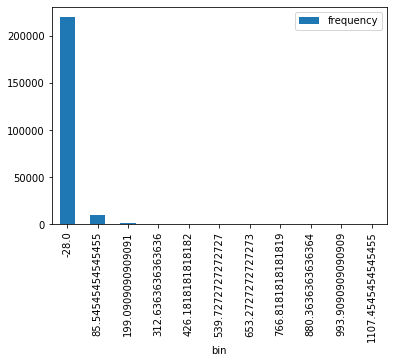

In [0]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*delay_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');


# Stations

In [0]:
stations = spark.read.option("header", "true").csv("dbfs:/mnt/mids-w261/DEMO8/gsod/stations.csv.gz")

In [0]:
display(stations.describe())

summary usaf wban name country state call lat lon elev begin end count 29771 29771 28982 28833 6742 10887 28567 28566 28473 29771 29771 mean 571613.0088459856 89988.97413590406 NaN null null 6504.5 30.674006125949553 -3.551033956451764 344.5273416921254 1.9782414351818886E7 2.004958363887676E7 stddev 304536.39977816143 27277.1013211369 NaN null null 9198.752116455797 28.80919467376261 87.29020816944056 590.7682889480685 234526.86689842667 193681.5670540804 min 007018 00001 ... AA AK 050E -0.017 -0.005 +0000.0 19010101 19051231 max A51256 99999 ZYRYANKA ZI YT ZYYY 9.994 99.983 -0999.9 20190103 20190305

In [0]:
from pyspark.sql import functions as f
stations.where(f.col('name').contains('ATLANTA HARTSFIELD INTERNATIONAL AIRPORT, GA US'))

Out[109]: DataFrame[usaf: string, wban: string, name: string, country: string, state: string, call: string, lat: string, lon: string, elev: string, begin: string, end: string]

In [0]:
display(stations.where(f.col('call').contains('LAX')))


usaf wban name country state call lat lon elev begin end 999999 23174 LOS ANGELES MUNICIPAL ARPT US CA KLAX 33.938 -118.389 +0099.4 19470101 19721231 722950 23174 LOS ANGELES INTERNATIONAL AIR US CA KLAX 33.938 -118.389 +0029.6 19440101 20190304

In [0]:
stations.select('name').distinct().count()

Out[45]: 26497

In [0]:
display(stations.select('name').distinct())

name HATTFJELLDAL-KRUTA COLLAFIRTH HILL WINDY HEAD ST ATHAN ARESKUTAN RYDAL FLASH-IN-STAFFORD EPINAL-DOGNEVILLE FET I EIDFJORD SAINT LEOCADIE COTTBUS HOLAND-FOSSER HVERAVELLIR OTA WESTERLAND/SYLT & VAASA KESKUSTA FRASERBURGH (LGT-H) GLASGOW WEA. CEN. GODHAVN PORT RANUA KK SUOLOVUOPMI JOKKMOKK AUK-ALFA STORBO WINCHESTER VALOGNES (AUT) GUNNARN VISINGSO TEMP FOR 03453 WITTERING (AUT) KEMBLE ABINGDON(RAF) PRAWLE POINT TAVANASA OLANDS SODRA GRUND SPITTAL OF GLENSHEE CWMBARGOED LUTON ARPT PENDENNIS POINT FICHTELBERG MTN & YTTERHOLMEN FYR SANDSOY GREAT MALVERN STOREY ARMS CHENIES(AUTO) DUBLIN WEATHER CENTER MOURUDALUR BRIENZER ROTHORN SALEZ SKLINNA FYR WHINS POND (AUX) NAKSKOV AIRPORT STEVNS BLOMSKOG DALWHINNIE SAUGHALL WYTON THE NEEDLES (CAPE) ANNAGHMORE LE PUY CITY GRENOBLE GERONA-IN-CATALUNA MATTMAR TYVELSE BERG I SNASA SODERHAMN NASHUVUD MALAGA BOGUS GERMAN OSBY REYDARFJORDUR GOERLITZ SOGNDAL/HAUKASEN KINGS CLIFF RAF BERN-BELPMOOS TANCOS SKOMVAER (LGT-H) KARMOY FJALLNAS RAF TIBENHAM BRACKNELL/BEAUFORT SKIVE ETAIN GARDELEGEN (AUT) & HOKMARKSBERGET MOLLA HANO ISLAND (LGT-H) TVINGSTRUP KLIMPFJALL NEUBRANDENBURG PRESCHEN VANGSNES BURRINGTON WELLOW SUDOK GRIMSEY ISLAND MATT HEMAVAN KOTKA KIRKONMAA SCILLY/ST. MARY'S SINSIN RECHICOURT-RADRA LONS-LE-SAUNIER RUSTEFJELBMA LYNGDAL I NUMEDAL GUSTAVSFORS RYNGE KILDONAN BELL ROCK (LGT-H) NORTH HESSARY TOR HALL LAND BODO-VAGONES FAGRE WOODBRIDGE RAF ABERDARE GAUSTATOPPEN ESRANGE SVARTEBORG FAIRLIGHT STRANDHOFN DYNJANDIHEIDI JULIE WITTENBERGE & MIDTLAEGER PUUMALA KK SKIPTON NO2 MALVERN MONTDIDIER COLLMBERG (DEAD) MALMO /BULLTOFTON BASS ROCK (LGT-H) RAF HORHAM BENTWATERS RAF APT/ST. CHRISTOL AB TEST SAMOS 03761 ESKILSTUNA(SWE-AFB& CARTERHOUSE EAST HOATHLY APUTITEQ (AUT) DOUBS UMEA-SOL K13-A MONTEVENTOSO PERDIGUERA COIMBRA KILLIN CYNWYD COTTESMORE DAMBLAIN (FAFB) MUODOSLOMPOLO UPPER HEYFORD(USAF) SOUTHWEST YELVERTON NEEM DOLE/TAVAUX FOULA NO2 BECAME STN 031491 VILA REAL SALLENT DE GALLEGO 'RESPOMU KONGSVIK FLATRUET AONACH MOR LOCHCARRON BRUGG-WILDEGG PORTHDYNLLAEN SUKKERTOPPEN GROUIN DE CANCALE HUNGE ISLAY (PORT ELLEN) LANNAVAARA & VAXJO/URASA(SAFB) SCILLY/ST.MARYS LOLLAND FALSTER MARIBO KARESUANDO CAPEL DEWI MYKINES LE GOEREE LURE/MALBOUHANS AFB TELLEJAUR LEAVESDEN FREDERIKSHAVN PANTICOSA 'REFUGIO CASA PIED EGGEBEK RITSEM TREILLIERES-RADAR GADDEDE NEWCASTLE ON CLUN CARRIGANS DUNDAS VAERLOSE VUOGGATJALME GALASHIELS CAPTIEUX MET ARE RISTRASK STAFHOLTSEY PARIS ST-MAUR CHAMPFORGEUIL HAMMERFEST RADIO KLOVSJO VRETA KLOSTER USAN HOLME MOSS WOODFORD CAPE TOBIN (AUT) HESSELOE AGUION FRIGG ATORP SISIMIUT SINDAL SITTERDORF CHATILLON-SUR-SEINE KIEL/KRONSHAGEN SUORVA TAIPALSAARI KYLANIEMI HIGH WICOMBE(USAF) LYONSHALL BRACKNELL (AUT) TOUL/ROSIERES TETEROW & KARLSTAD SOL MALILLA FORT WILLIAM NEWCASTLE/WOOLSING. DYBVAD BORLANGE KAAMANEN MUCKLE HOLM AUGHTON BINBROOK(RAF) LIZARD LIGHTHOUSE QAANAAQ JAKOBSHAVN BURGOS LINDENBERG & SUNDERLAND UNIVERSITY HEMSWELL MEETPOST NOORDWIJK ANGERMUENDE KONGSBERG IV IDVATTNET MALEXANDER BRYNAMMAN DAGALI HAUGASTOL LYBSTER HOYLANDET OVERKALIX UGO DANEBORGE ROMA CHURCH FENTON JUBILEE CORNER UETLIBERG BERGEN-FREDRIKSBERG ROYAL SOVEREIGN(LH) MAJAVATN III SUOMUSJARVI STRATHY PT. (LGT-H) SELBU-STUBBE SALLA BEDFORD AIRPORT GAWLISH STATION NORD DALS-ED HONINGTON WYESHAM NOVILLE TORNEHAMN (AUT) HALLANDSASEN NEWCASTLE WEATHER CENTRE MONKSTONE PT. REDHILL SHEERNESS BROCKEN (PEAK) MODALEN II SKILLINGMARK WETHERSFIELD(RAF) WEATHERSFIELD RAF MELSBROEK (BEL-AFB) MEININGEN & LOFSDALEN FALUN MULL OF GALLOWAY LH CROMER (LGT-H) LA ROCHELLE/LALEU RANA-BASMOEN ABISKO SYDOSTBROTTEN (LH) KNOCKAREVAN CASTILLO GALERAS NANTMOR LES ESCALDES LILAND MALMBERGET STENSJON (AUT) VINDELN SNAVLUNDA LOCHLUICHART RHUVAAL ABERHOSAN SHEPHERD'S GROVE REYKJANESVITI LOGRONO KORPILOMBOLO NORRHOG CHALONS/VATRY FAFB& NARVIK III/FRAMNES KITTILBU FRANSTA GLENLEE NIJAR FISKABYGD KOKKOLA HOLLIHAKA LAUSANNE CAPTIEUX WEATHER GLAPEN LIGHTHOUSE FORDE-TEFRE KULLEN (LGT-H) CRANFIELD MONEYDIG VANDEL ZARAGOZA (MIL/CIV)& NEUMUNSTER/WASB

In [0]:
weather.select('NAME').distinct().count()

In [0]:
display(weather.select('name').distinct())